# Install and test all required packages:


In [1]:
# NumPy:
import numpy as np

In [2]:
np.version.version

'1.11.2'

In [3]:
# SciPy:
import scipy 

In [4]:
scipy.__version__

'0.18.1'

In [5]:
# scikit-learn:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

/home/mk/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
sklearn.__version__

'0.18.1'

In [7]:
# TensorFlow:
import tensorflow as tf

In [8]:
tf.__version__

'0.11.0rc2'

In [9]:
# Matplotlib Pyplot:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# ComputerVision:
import cv2

In [11]:
cv2.__version__

'3.1.0'

In [12]:
# Further packages:
import pickle
from tqdm import tqdm
from IPython.display import display, Image
import os
import math

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [13]:
training_file = "/home/mk/Downloads/train.p"
testing_file = "/home/mk/Downloads/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [14]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [15]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

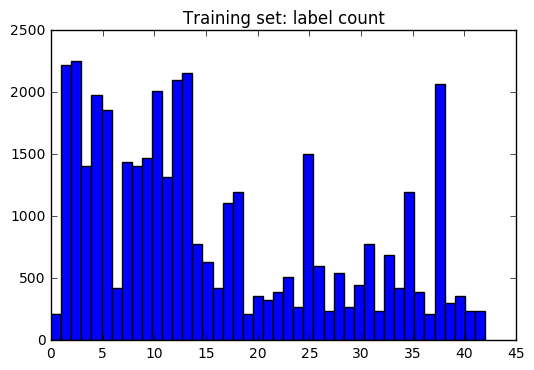

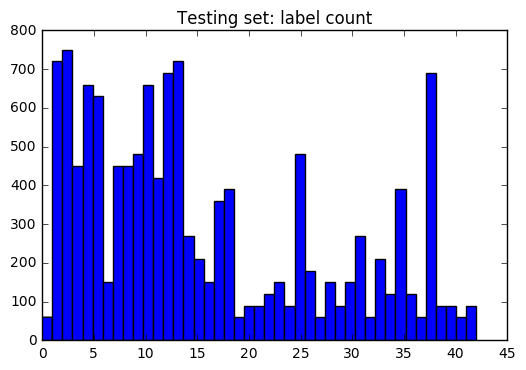

In [16]:
# Project exercise: Plot the count of each sign (i.e., histograms):
plt.hist(y_train, bins=n_classes)
plt.title("Training set: label count")
plt.show()
plt.hist(y_test, bins=n_classes)
plt.title("Testing set: label count")
plt.show()

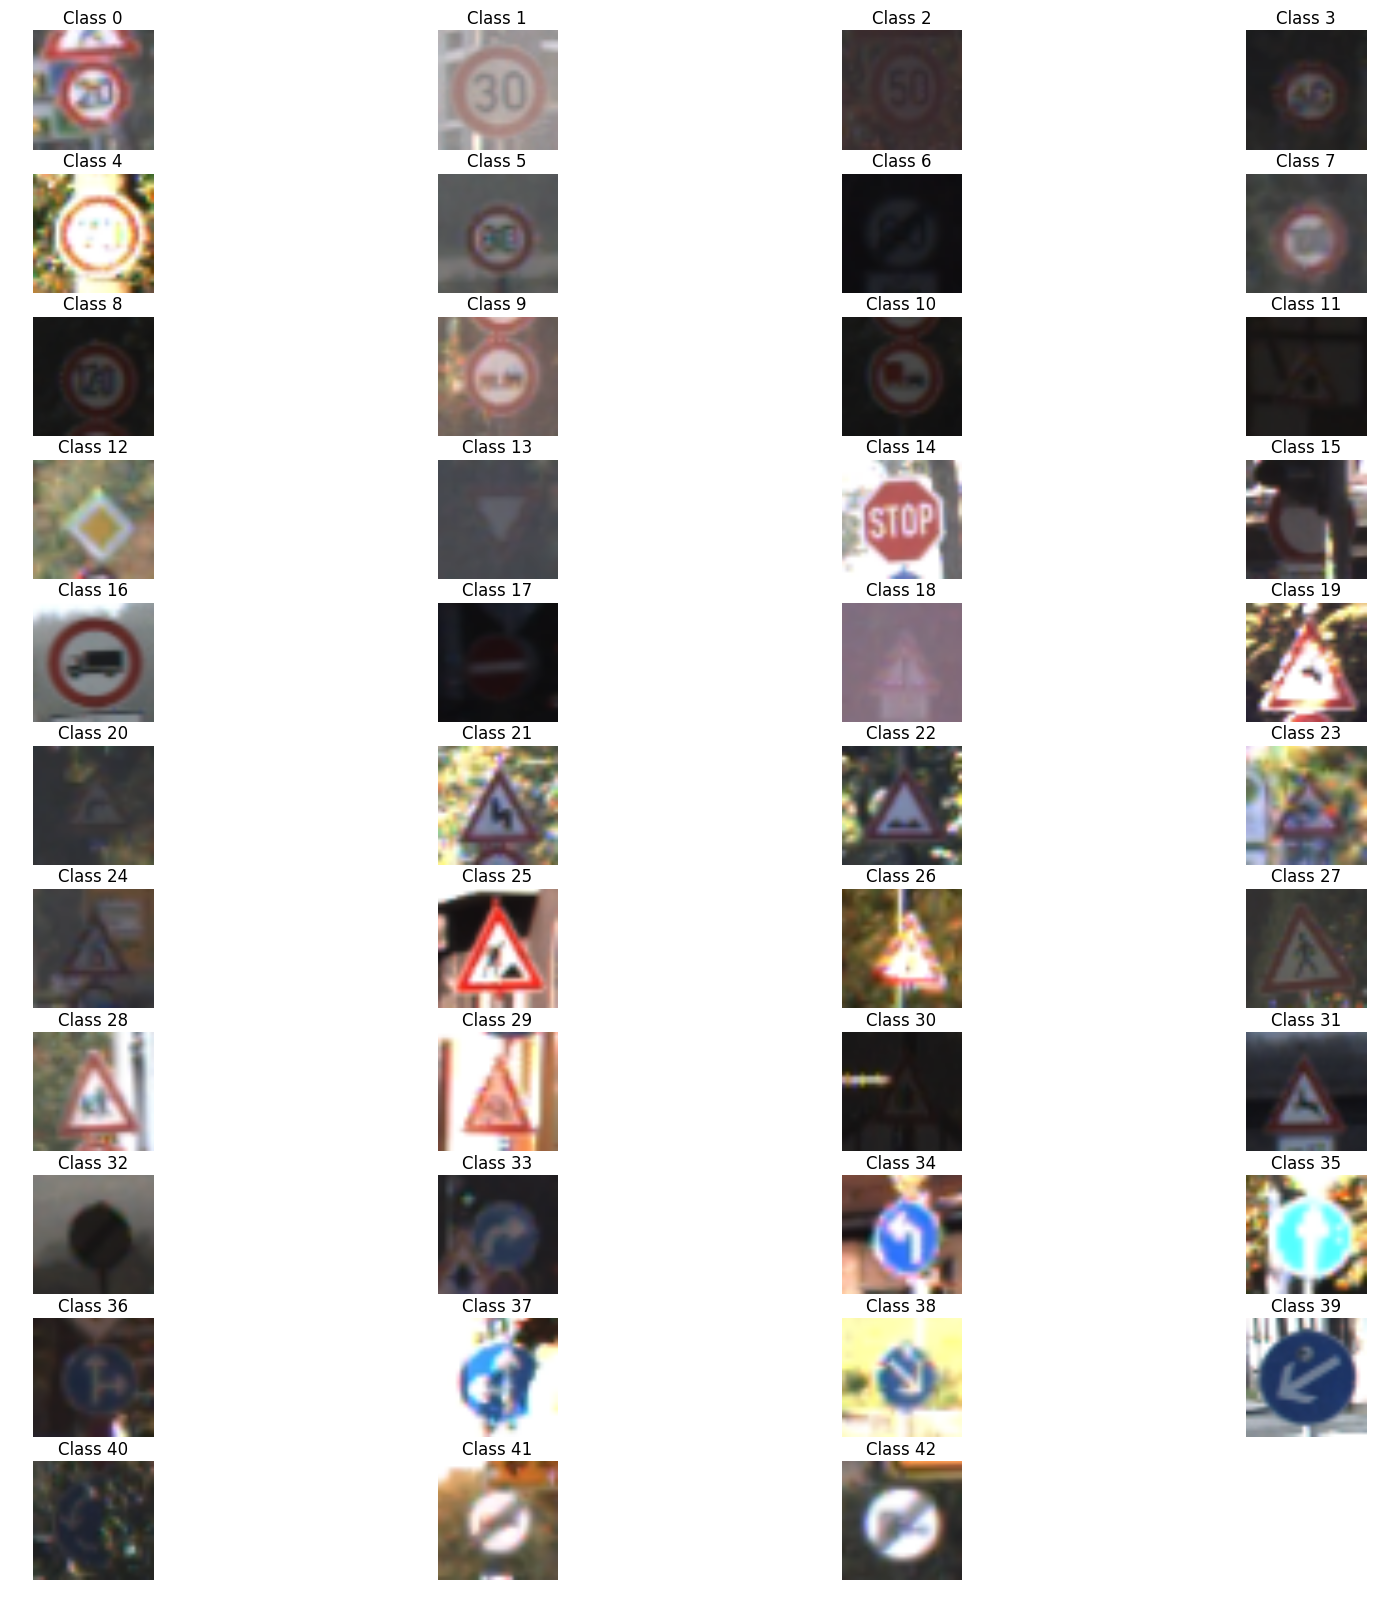

In [17]:


plt.figure(figsize=(20, 20))


i = 1

for class_instance in range(n_classes):
    
    plt.subplot(11, 4, i)
    plt.title( "Class {0}". format( class_instance ) )
    plt.axis('off')
    img = X_train[ y_train.tolist().index( class_instance ) ]
    plt.imshow(img)
    
    i = i+1  



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [18]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [19]:
# Create X_train_normalized and X_test_normalized

def normalization( value_actual ):
    value_max = 255.0
    value_min = 0.0
    value_normalized = ( value_actual - value_min ) / ( value_max - value_min )
    return value_normalized

X_train_normalized = normalization( X_train ) 
X_test_normalized = normalization( X_test ) 

print(X_train_normalized.shape)
print(X_test_normalized.shape)

(39209, 32, 32, 3)
(12630, 32, 32, 3)


In [20]:
encdr = LabelBinarizer().fit( y_train )
y_train_numerical = encdr.transform( y_train ).astype(np.float32) 
y_test_numerical = encdr.transform( y_test ).astype(np.float32) 

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

To preproces the data, I first checked the image size, according to the exercise, 
plotted the counts of the labels in the training data. 

In total, there are 43 different labels. They are plotted above.

The training data is not uniformly distributed across the labels. Rather, there are
some random "peeks". However, since there are multiple training instances for all 
labels, I will first focus on predicting labels with the existing data set. 

As suggested by the exercise, I also conducted normalization of the features in the 
training and testing data. 


In [21]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [22]:
# train --> train + validation
X_train_normalized, X_validation_normalized, y_train_numerical, y_validation_numerical = train_test_split( X_train_normalized, y_train_numerical,test_size=0.1, random_state=1) 

In [23]:
if not os.path.isfile( '/home/mk/Downloads/data.pickle' ):
    try:
        
        with open('/home/mk/Downloads/data.pickle', 'wb') as file:
            pickle.dump(
                {
                    'X_train': X_train_normalized,
                    'X_valid': X_validation_normalized,
                    'X_test': X_test_normalized,
                    'y_train': y_train_numerical,
                    'y_valid': y_validation_numerical,
                    'y_test': y_test_numerical,
                },
                file, 
                pickle.HIGHEST_PROTOCOL)
            
    except Exception as e:
        print('Exception. Details: ', e)
        raise

print('You have a new pickle!')

You have a new pickle!


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Training and testing data was provided. 

I split the training data into training (90%) and validation data (10%). 

For now, I do not generate additional data because there are multiple training instances 
for all labels. Furthermore, the distribution in the training and testing dataset are similar.
Thus, non-uniformity should only have a minor effect on prediction accuracy.



In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [25]:
# Load prepared data based on pickle tutorial example:
fileName = '/home/mk/Downloads/data.pickle'
with open(fileName, 'rb') as f:
    data_bigfadpickle = pickle.load(f)
    X_train = data_bigfadpickle['X_train']
    X_valid = data_bigfadpickle['X_valid']
    X_test = data_bigfadpickle['X_test']
    y_train = data_bigfadpickle['y_train']
    y_valid = data_bigfadpickle['y_valid']
    y_test = data_bigfadpickle['y_test']
    del data_bigfadpickle 

In [26]:
# Smart peers on slack noted that the signs are not green (mostly red, blue, white). 
#Thus, the green channel can be ignored in order to reduce time required for training models.
# So remove green:

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

if X_train.shape[3] != 2:
    X_train = np.copy(X_train[:,:,:,[0,2]])
if X_valid.shape[3] != 2:
    X_valid = np.copy(X_valid[:,:,:,[0,2]]) 
if X_test.shape[3] != 2:
    X_test = np.copy(X_test[:,:,:,[0,2]])

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(37248, 32, 32, 3)
(1961, 32, 32, 3)
(12630, 32, 32, 3)
(37248, 32, 32, 2)
(1961, 32, 32, 2)
(12630, 32, 32, 2)


In [27]:
# TODO: number of training examples
n_train = X_train.shape[0] # 31367

# TODO: number of testing examples
n_valid = X_valid.shape[0] #7842

# TODO: number of testing examples
n_test = X_test.shape[0] #12630

# TODO: what's the shape of an image?
image_shape = X_train[0].shape # 32*32*3 --> 32*32 pixels * channels (red, green, blue)
print( "X_train.shape =", X_train.shape )
print( "X_train.shape[0] =", X_train.shape[0] )
print( "X_train.shape[1] =", X_train.shape[1] )
print( "X_train.shape[2] =", X_train.shape[2] )
print( "X_train.shape[3] =", X_train.shape[3] )
print( "image_shape[0] =", image_shape[0] )
print( "image_shape[1] =", image_shape[1] )
print( "image_shape[2] =", image_shape[2] )
print( "X_train[0].shape =", X_train[0].shape )
print( "X_train[1].shape =", X_train[1].shape )
print( "X_train[1].shape[0] =", X_train[1].shape[0] )
print( "X_train[1].shape[1] =", X_train[1].shape[1] )
print( "X_train[1].shape[2] =", X_train[1].shape[2] )

# TODO: how many classes are in the dataset
n_classes = y_train.shape[1] # 43

X_train.shape = (37248, 32, 32, 2)
X_train.shape[0] = 37248
X_train.shape[1] = 32
X_train.shape[2] = 32
X_train.shape[3] = 2
image_shape[0] = 32
image_shape[1] = 32
image_shape[2] = 2
X_train[0].shape = (32, 32, 2)
X_train[1].shape = (32, 32, 2)
X_train[1].shape[0] = 32
X_train[1].shape[1] = 32
X_train[1].shape[2] = 2


In [28]:
X_1 = X_train[0].shape[0] 
X_2 = X_train[0].shape[1] 
X_3 = X_train[0].shape[2] 
X_size = X_1 * X_2 * X_3 # 3072

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("image_shape =", image_shape)
print("Number of classes =", n_classes)
print("X_1 =", X_1)
print("X_2 =", X_2)
print("X_3 =", X_3)
print("X_size =", X_size)
print( "X_train.shape =", X_train.shape )
print( "X_valid.shape =", X_valid.shape )
print( "X_test.shape =", X_test.shape )
print( "y_train.shape =", y_train.shape )
print( "y_valid.shape =", y_valid.shape )
print( "y_test.shape =", y_test.shape )

Number of training examples = 37248
Number of validation examples = 1961
Number of testing examples = 12630
image_shape = (32, 32, 2)
Number of classes = 43
X_1 = 32
X_2 = 32
X_3 = 2
X_size = 2048
X_train.shape = (37248, 32, 32, 2)
X_valid.shape = (1961, 32, 32, 2)
X_test.shape = (12630, 32, 32, 2)
y_train.shape = (37248, 43)
y_valid.shape = (1961, 43)
y_test.shape = (12630, 43)


In [29]:
X_train = X_train.reshape((-1, X_size))
X_valid = X_valid.reshape((-1, X_size))
X_test = X_test.reshape((-1, X_size))

print( "X_train.shape =", X_train.shape )
print( "X_valid.shape =", X_valid.shape )
print( "X_test.shape =", X_test.shape )

X_train.shape = (37248, 2048)
X_valid.shape = (1961, 2048)
X_test.shape = (12630, 2048)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My work below will be based on TensorFlow's MNIST Expert tutorial: 
https://www.tensorflow.org/versions/r0.10/tutorials/mnist/pros/index.html

My features are a 37248*2048 matrix. 
37248 because n is 37248. 2048 because images are 32*32 pixels * 2 channels.
The validation data has 1961 instances and the test data has 12630 instance. 

In line with the tutorial, I am using softmax regression to predict the image labels. 
My network has one layer because two layers, as suggested by the tutorial, always
resulted in an error saying the kernel shut down and starts again. After some Google 
research, this seems to happen especially when using Jupyter. Anyway, with one layer it works fine.

Besides that, I followed the tutorials. That is, initial values are set to small positive values. For pooling I am using max pooling over 2x2 blocks and the first convolutional layer is set to depth 32 and a patch size of 5 * 5 pixels. After running the models several time, I noticed that I do not need 1024 hidden layers. So I am only using 256.

Finally, to reduce the risk of overfitting, I included the tutorial part dealing with dropout. As suggested
by the tutorial, I set the dropout rate to 50%.



In [30]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [31]:
# https://www.tensorflow.org/versions/r0.10/tutorials/mnist/pros/index.html

# Reuse TF MNIST Expert Tutorial variable definitions:
x = tf.placeholder( tf.float32, shape=[ None, X_size ] ) 
y_ = tf.placeholder( tf.float32, shape=[ None, y_train.shape[1] ] )  

# Reuse methods from TF MNIST expert tutorial:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding='SAME') 

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

hidden = 256 
deep = 32

# First convolutional layer:
W_conv1 = weight_variable( [ 5, 5, X_3, deep ] ) 
b_conv1 = bias_variable( [deep] )

x_image = tf.reshape( x, [ -1, X_1, X_2, X_3 ] )

h_conv1 = tf.nn.relu( conv2d(x_image, W_conv1) + b_conv1 )
h_pool1 = max_pool_2x2(h_conv1)


### Densely Connected Layer
W_fc1 = weight_variable([image_shape[0]//4 * image_shape[1]//4* deep, hidden])
b_fc1 = bias_variable([hidden])
shape = h_pool1.get_shape().as_list() 
h_pool1_flat = tf.reshape(h_pool1, [-1, shape[1] * shape[2] * shape[3]]) 
h_fc1 = tf.nn.relu(tf.matmul(h_pool1_flat, W_fc1) + b_fc1)

### Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer
W_fc2 = weight_variable([hidden, y_train.shape[1]]) 
b_fc2 = bias_variable([y_train.shape[1]]) 

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [32]:
# Step 2: Softmax regression prediction:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1)), tf.float32))

fd_train = {x: X_train, y_: y_train, keep_prob: 1.0}
fd_valid = {x: X_valid, y_: y_valid, keep_prob: 1.0}
fd_test = {x: X_test, y_: y_test, keep_prob: 1.0}

In [33]:
alpha = 0.025
tf_gdo = tf.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)

In [34]:
epochs = 20 
batch_size = 100

In [35]:
print( "X_train.shape =", X_train.shape )
print("y_train.shape =",y_train.shape)
print(cross_entropy)

X_train.shape = (37248, 2048)
y_train.shape = (37248, 43)
Tensor("Mean:0", shape=(), dtype=float32)


In [36]:
# Measurements use for graphing loss and accuracy
# Batch handling (http://stackoverflow.com/questions/33833818/printing-the-loss-during-tensorflow-training)

log_n = 25
batches = []
batch_loss = []
batch_acc_train = []
batch_acc_valid = []

acc_valid = 0.0
acc_test = 0.0

In [37]:
# Training and validation:

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    batch_count = int( math.ceil( len(X_train) / batch_size ) )

    for epoch in range(epochs):
        
        tqdm_bar_batches = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(1+epoch, epochs))
        for batch in tqdm_bar_batches:
            batch_start = batch*batch_size
            batch_x = X_train[batch_start:batch_start + batch_size]
            batch_y = y_train[batch_start:batch_start + batch_size] 
            _, loss_val = sess.run( [tf_gdo, cross_entropy], feed_dict={x: batch_x, y_: batch_y, keep_prob: 0.5})
            if not batch % log_n:
                acc_train = sess.run(acc, feed_dict=fd_train)
                acc_valid = sess.run(acc, feed_dict=fd_valid)
                previous_batch = batches[-1] if batches else 0
                batches.append(log_n + previous_batch)
                batch_loss.append(loss_val)
                batch_acc_train.append(acc_train)
                batch_acc_valid.append(acc_valid)
        acc_valid = sess.run(acc, feed_dict=fd_valid)


Epoch 20/20: 100%|██████████| 373/373 [01:45<00:00,  3.52it/s]


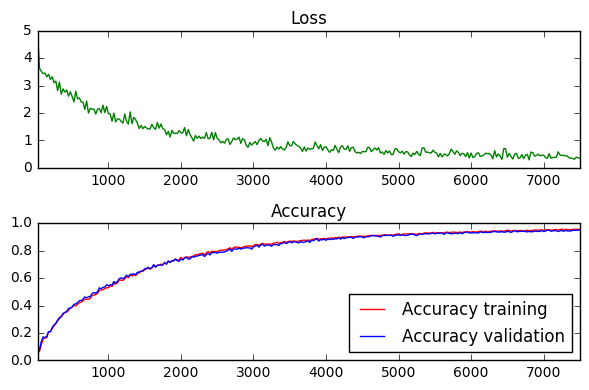

Accuracy validation: 0.9439061880111694


In [38]:

# MATLAB subplot:
# http://matplotlib.org/users/pyplot_tutorial.html:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, batch_loss, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])

acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, batch_acc_train, 'r', label='Accuracy training')
acc_plot.plot(batches, batch_acc_valid, 'b', label='Accuracy validation')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)

plt.tight_layout()
plt.show()

print('Accuracy validation: {}'.format(acc_valid))

In [39]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    batch_count = int(math.ceil(len(X_train)/batch_size))
    for epoch in range(epochs):
        tqdm_bar_batches = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(1+epoch, epochs))
        for batch in tqdm_bar_batches:
            batch_start = batch * batch_size
            batch_x = X_train[ batch_start : batch_start + batch_size ]
            batch_y = y_train[ batch_start : batch_start + batch_size ]
            _ = sess.run( tf_gdo,
                         feed_dict={x: batch_x, y_: batch_y, keep_prob: 1.0})
        acc_test = sess.run(acc, feed_dict=fd_test)

print('Accuracy test: {}'.format(acc_test))

Epoch 20/20: 100%|██████████| 373/373 [00:15<00:00, 24.82it/s]


Accuracy test: 0.8614410161972046


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used TensorFlows Gradient Descent Optimizer with a learning rate of 
alpha=0.025, 100 batch size, and 20 epochs. 


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I started with the TF MNIST Expert tutorial because the task is almost the same.
However, there were some differences. In my opinion the most challenging aspect 
was to keep track of shape sizes. Next time, I will probably use a Python IDE and only
copy my code to Jupyter in the end. 

To optimize my model, I tested it with several parameters (e.g., different amounts
of hidden layers). Overall, I think the model performs quite well. However, it is
not yet comparable to the models in the provided paper with accuracy of 99%.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [40]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

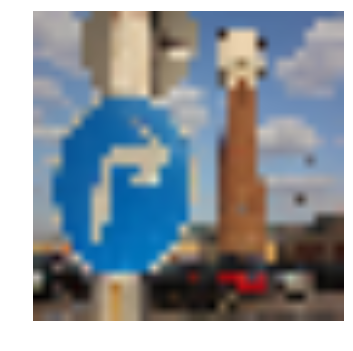

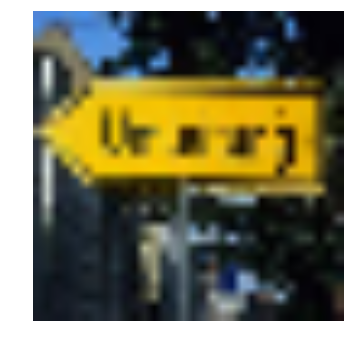

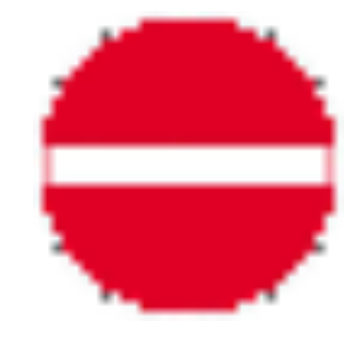

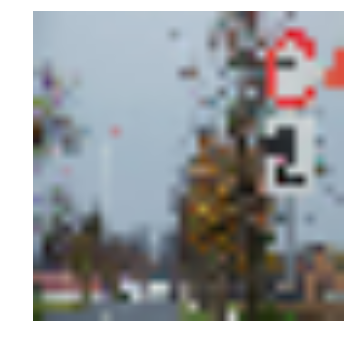

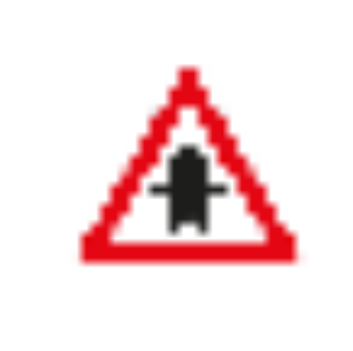

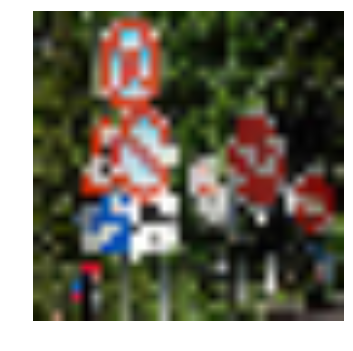

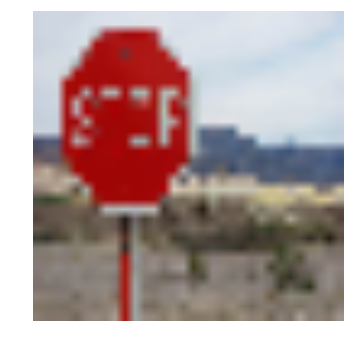

In [41]:
# Create numpy array for X (i.e., all loaded signs):
own_signs_x = np.zeros((1,32,32,2)) 

sign_path = '/home/mk/Downloads/OwnSigns/'

# Load array and display own signs:
own_signs_dir = os.listdir(sign_path)
for sign_fileName in own_signs_dir:
    sign = plt.imread( sign_path + sign_fileName )
    sign = cv2.resize(sign, (32,32))
    plt.axis('off')
    plt.imshow(sign)
    plt.show()
    own_signs_x = np.append( own_signs_x, [sign[:,:,[0,2]]], axis=0) 
    
own_signs_x = own_signs_x[1:]
own_signs_x = normalization(own_signs_x)
own_signs_x = np.reshape(own_signs_x, [-1,32*32*2])

In [42]:
# Expected class:
own_signs_y = np.array([[33],[1],[17],[4],[11],[1],[14]]) 

# Using value 1 if picture does not show a sign from the training data.
# Also, using value 1 if picture shows multiple signs.

encdr = LabelBinarizer().fit( y_test ) # y_train ?
own_signs_y = encdr.transform( own_signs_y ).astype(np.float32)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

The images are plotted above. 

Yes, I intentionally used signs that are easy and difficult to identify. 
For instance, I want to see what the predictions are, if signs are not
in the center of the image, if the image displays multiple signs, and 
if the image displays an sign that was not included in the training set.

In [43]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [44]:
fd_test = {x: own_signs_x, y_: own_signs_y, keep_prob: 1.0}

# Find the best parameters for each configuration
epochs = 20
batch_size = 100
alpha = 0.025

tf_gdo = tf.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)    

# The accuracy measured against the test set
acc_test = 0.0

with tf.Session() as sess:
    
    sess.run(tf.initialize_all_variables())
    batch_count = int( math.ceil( len(X_train) / batch_size ) )

    for epoch in range(epochs):
        
        tqdm_bar_batches = tqdm( range(batch_count), desc='Epoch {:>2}/{}'.format(1+epoch, epochs) )
        
        for batch in tqdm_bar_batches:
            batch_start = batch*batch_size
            batch_x = X_train[ batch_start : batch_start + batch_size ]
            batch_y = y_train[ batch_start : batch_start + batch_size ]

            _ = sess.run(tf_gdo, feed_dict={x: batch_x, y_: batch_y, keep_prob: 0.5})
            
        acc_test, yy_ = sess.run([acc, y_conv], feed_dict=fd_test)

own_signs_res = np.argmax(yy_, axis=1)
print(own_signs_res)
print('Accuracy test: {}'.format(acc_test))

Epoch 20/20: 100%|██████████| 373/373 [00:14<00:00, 25.01it/s]

[35 12 17 11 11 18 10]
Accuracy test: 0.2857142984867096


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

No, the model is not able to perform equally well. However, I did not expect that.

When looking at the results, I can see the the "easy" signs are basically identified.
However, "difficult" signs (e.g., multiple signs, signs not existing in training data)
were not classified.

In [45]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

(7, 2048)
(7, 43)
(7,)
Actual new sign number  1 : 


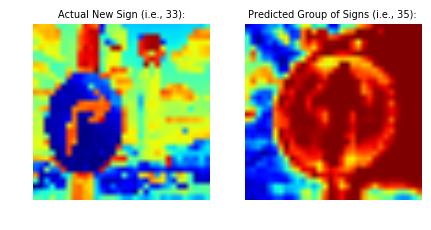

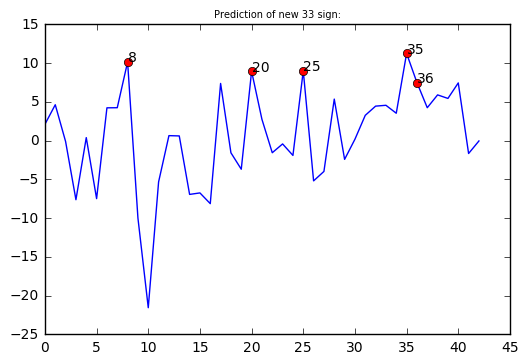

Actual new sign number  2 : 


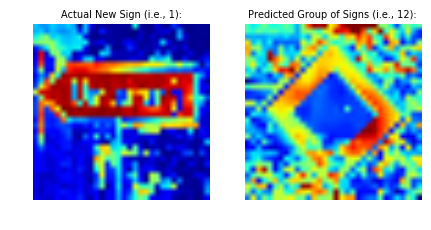

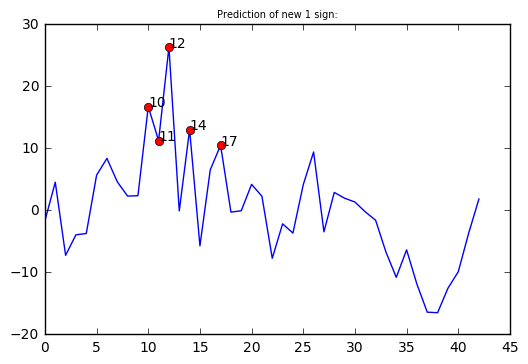

Actual new sign number  3 : 


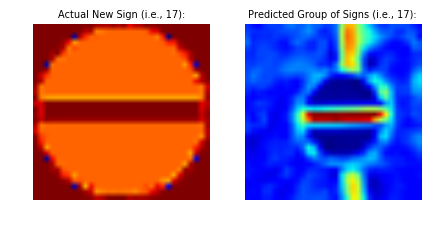

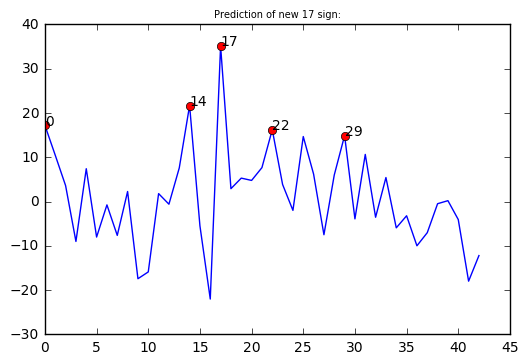

Actual new sign number  4 : 


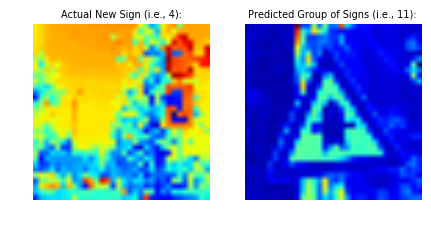

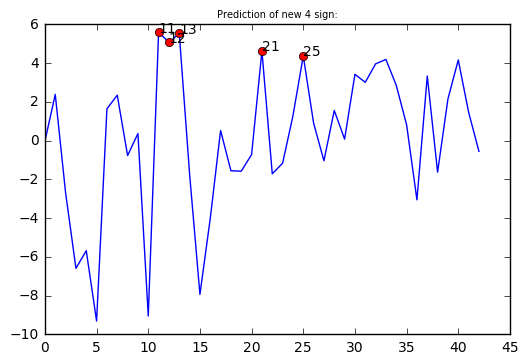

Actual new sign number  5 : 


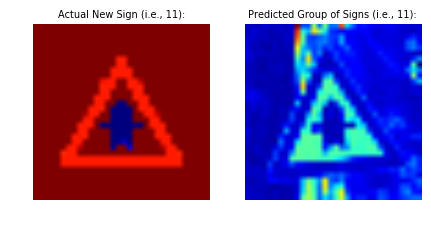

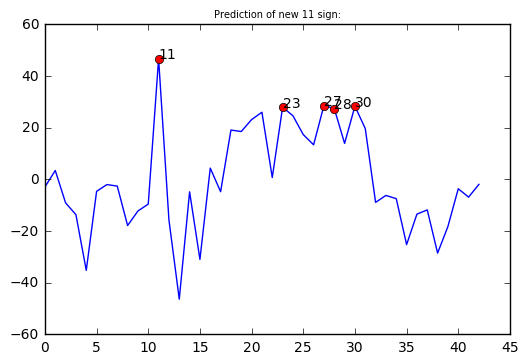

Actual new sign number  6 : 


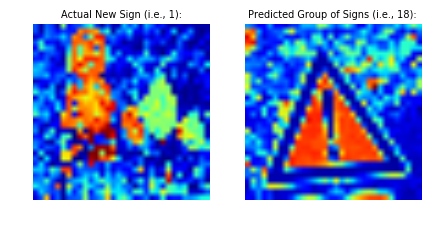

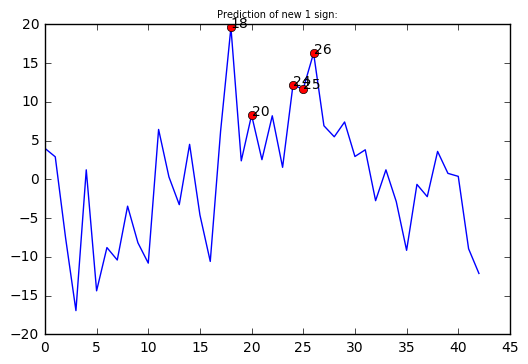

Actual new sign number  7 : 


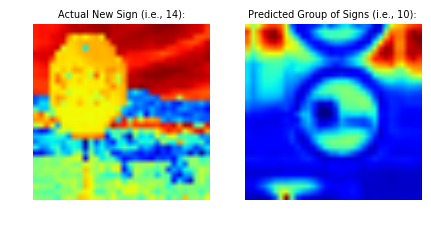

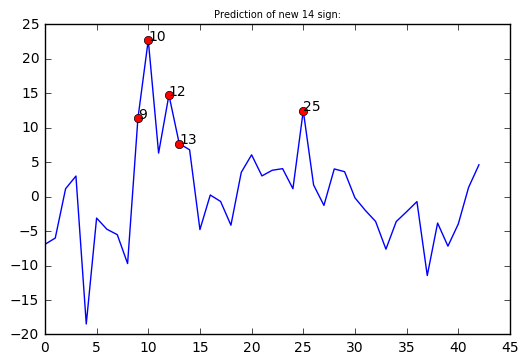

In [46]:
print(own_signs_x.shape)
print(own_signs_y.shape)
print(own_signs_res.shape)

own_signs_res = np.argmax(yy_, axis=1)

for i in range( len(own_signs_res) ):
    
    print("Actual new sign number ", i+1,": ")
    
    #fig, ax = plt.subplots()
    plt.figure(figsize=(5, 5))

    # Show Original and Predicted signs next to each other:
    plt.subplot(121)
    plt.title("Actual New Sign (i.e., {}):".format(np.argmax(own_signs_y[i])), fontsize=7)
    #plt.figure(suptitle('test title', fontsize=10))
    plt.axis('off')
    plt.imshow(np.reshape(own_signs_x[i],[32,32,2])[:,:,0])
    
    plt.subplot(122)
    plt.title("Predicted Group of Signs (i.e., {}):".format(own_signs_res[i]), fontsize=7)
    plt.axis('off')
    plt.imshow(np.reshape(X_train[np.argwhere(np.argmax(y_train, axis=1)==own_signs_res[i])[0]],[32,32,2])[:,:,1])
    
    plt.show()
    
    plt.plot(yy_[i])
    
    #i = 1
    #for class_instance in range(n_classes):
    #plt.subplot(11, 4, i)
    #plt.title( "Class {0}". format( class_instance ) )
    #plt.axis('off')
    #img = X_train[ y_train.tolist().index( class_instance ) ]
    #plt.imshow(img)
    #i = i+1  
    
    # top-k chart:
    
    k = np.argsort(yy_[i])[::-1][:5]
    
    for k_i in k:
        plt.plot(k_i, yy_[i][k_i], 'ro')
        plt.annotate(k_i, xy=(k_i,yy_[i][k_i]))
    plt.title("Prediction of new {} sign:".format(np.argmax(own_signs_y[i])), fontsize=7)
    #plt.figure(figsize=(15, 5))
    #plt.yticks(0," ")
    plt.show()

    



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

On the "easy" signs, the model is quite certain. However, "moderate difficult" signs (e.g., sign 1) as well as the difficult/impossible signs, predictions are bad. I assume that the main reasons are bad image quality and/or a lot of background objects within the images that make it hard to identify the border-lines of the sign for which a label shall be predicted.

However, I also noted that, for instance, sign 5 is predicted correctly but other signs have also a quite high probability. Considering that sign 5 was very easy to identify, I would have expected other signs to have even lower probabilities. 


### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

I used the model/code of this notebook. 
In particular, my model is based on Tensorflows MNIST expert tutorial. 
Besides, I only used traditional Python packages such as matplotlib for
visualization.

I did not develop a dedicatedinterface for loading additional images. Rather, I 
googled for German traffic signs and selected a mixture of (potentially) easy-to-predict
and difficult-to-predict signs.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.